<a href="https://colab.research.google.com/github/nkaraffa/Intro-to-AI-Machine-Learning-and-Python-basics/blob/main/Neural_Network_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network - Fashion MNIST Problem**

> Use a neural network to determine fashion items

*   Import Fashion MNIST dataset
*   Train neural network to recognize images
*   Test neural network

Source:
*   https://www.kaggle.com/zalando-research/fashionmnist



**Import Libraries and Tools**

In [2]:
# Import libraries and tools

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

**Prepare Data - Divide into training & testing**

In [3]:
#
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Name dataset classes

In [5]:
# Name dataset classes

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Data Pre-processing

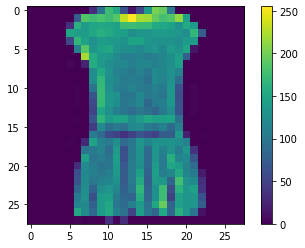

In [6]:
# Data Pre-processing
# View dataset images
plt.figure()
plt.imshow (x_train[3])
plt.colorbar()
plt.grid(False)

Data Normalization ( Convert color intensity to value between 0 - 1 )

In [7]:
x_train = x_train / 255     # Divide training variable by maximum color intensity  (Convert from 0-255 to 0-1)
x_test = x_test / 255       # Data normalization

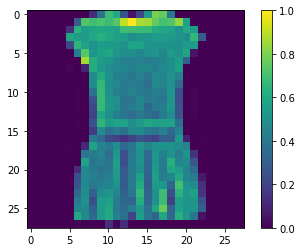

In [8]:
# Re-view dataset images after Data normalization
plt.figure()
plt.imshow (x_train[3])
plt.colorbar()
plt.grid(False)

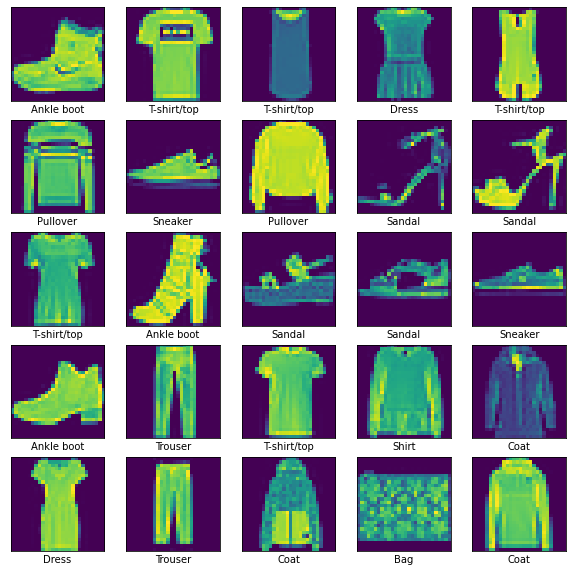

In [9]:
# Now let's verify the color intensity value for multiple images
plt.figure(figsize= (10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])

**Create Neural Network**

In [12]:
# Creating the Neural Network

model = keras.Sequential([
                        keras.layers.Flatten(input_shape = (28,28)),            # Input Layer: converts image from 2D to 1D for analysis (image size is 28x28)
                        keras.layers.Dense(128, activation = tf.nn.relu),       # Hidden Layer: # of neurons selection
                        keras.layers.Dense(10, activation = tf.nn.softmax)    # Outout Layer: values coorespond to 10 possible items

])

Model Compilation

In [21]:
# Model Compilation

model.compile (optimizer = tf.keras.optimizers.SGD(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])    #SGD: Stotastic Gradient Descent

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Train the Neural Network**

In [23]:
# Train the model

model.fit(x_train, y_train, epochs = 10)        # Our model will go through 10 iterations (60K images X 10 epochs)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9953 - accuracy: 0.6839
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5310 - accuracy: 0.8204
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4759 - accuracy: 0.8365
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4508 - accuracy: 0.8452
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4338 - accuracy: 0.8474
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4187 - accuracy: 0.8528
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4039 - accuracy: 0.8595
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3945 - accuracy: 0.8626
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3846 - accuracy: 0.8670
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.375

**Check Prediction Accuracy for Test Sample**

In [24]:
test_loss, test_acc = model.evaluate (x_test, y_test)
print ('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.4385 - accuracy: 0.8475
Test Accuracy:  0.8475000262260437


**Model Predictions**

In [25]:
# Instantiate prediction variable

predictions = model.predict(x_train)

In [32]:
# Use neural network to determine what 'image 0' is

predictions[14]        # This will display the propability for all 10 item outcomes

array([1.0629424e-05, 2.1230006e-05, 4.2406049e-05, 4.0438597e-05,
       8.8553952e-06, 1.0912411e-02, 1.5533493e-05, 9.8807973e-01,
       2.3733266e-04, 6.3151971e-04], dtype=float32)

In [33]:
# Display only the top probability outcome (class #)

np.argmax(predictions[14])

7

**Verify Model Prediction on Actual Result**

In [34]:
# Check expected outcome based on the above prediction (class #)

y_train[14]

7

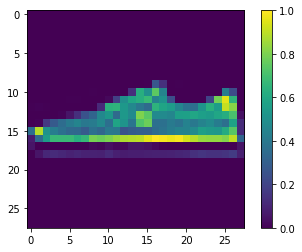

In [36]:
# Verify Model by viewing the predicted image
plt.figure()
plt.imshow (x_train[14])
plt.colorbar()
plt.grid(False)

In [37]:
# Display output class name versus index #

class_names [np.argmax(predictions[14])]

'Sneaker'